# Q02

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
mean1 = np.array([1, 2])
sigma1 = np.array([[1.8, -0.7], [-0.7, 1.8]])
mean2 = np.array([-1, -3])
sigma2 = np.array([[1.5, 0.3], [0.3, 1.5]])

## a.

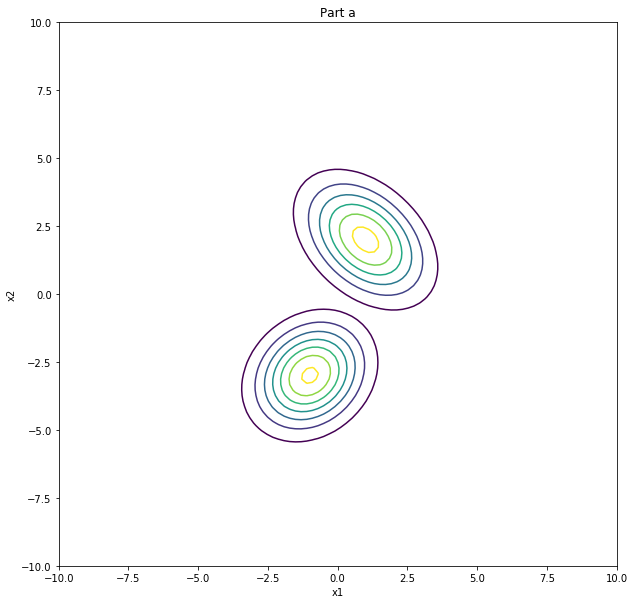

In [3]:
xlist = np.linspace(-10.0, 10.0, 100)
ylist = np.linspace(-10.0, 10.0, 100)
X, Y = np.meshgrid(xlist, ylist)
pos = np.array([Y,X]).T
rv1 = st.multivariate_normal(mean1, sigma1)
Z1 = rv1.pdf(pos)
rv2 = st.multivariate_normal(mean2, sigma2)
Z2 = rv2.pdf(pos)
plt.figure(figsize = (10,10))
plt.contour(X, Y, Z1)
plt.contour(X, Y, Z2)
plt.title('Part a')
plt.ylabel("x2")
plt.xlabel("x1")
plt.show()

## b.

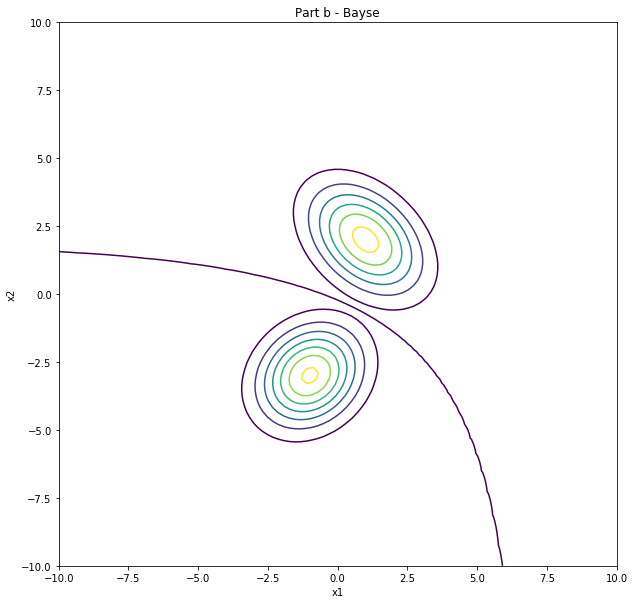

In [4]:
plt.figure(figsize = (10,10))
g = Z1-Z2
plt.contour(X, Y, Z1)
plt.contour(X, Y, Z2)
plt.contour(X, Y, g, levels=[0])
plt.title('Part b - Bayse')
plt.ylabel("x2")
plt.xlabel("x1")
plt.show()

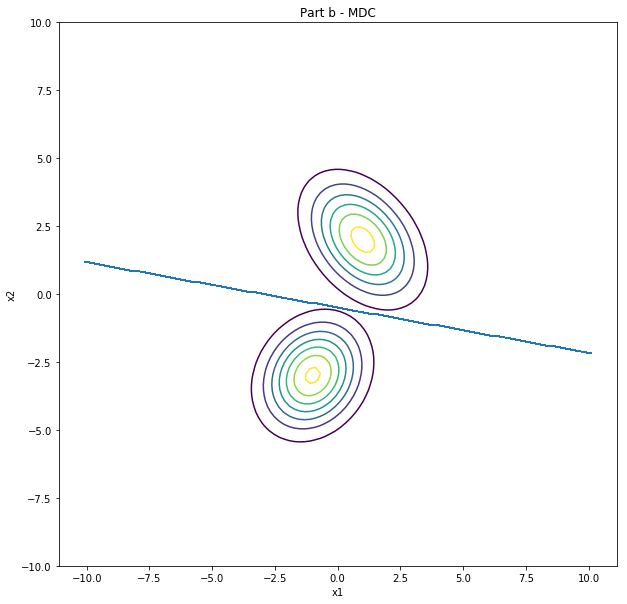

In [5]:
plt.figure(figsize = (10,10))
plt.contour(X, Y, Z1)
plt.contour(X, Y, Z2)
a = mean1[1]-mean2[1]/mean1[0]-mean2[0]
b = (-1/a)
m = (mean2+mean1)/2
z = (b*(X-m[0]))+m[1]
plt.scatter(X,z,marker='_')
arr = np.array(X)
plt.title('Part b - MDC')
plt.ylabel("x2")
plt.xlabel("x1")
plt.show()

## c.

In [12]:
sample1 = rv1.rvs(1000)
sample2 = rv2.rvs(1000)

In [13]:
def bayse(sample, a):
    z1 = rv1.pdf(sample)
    z2 = rv2.pdf(sample)
    y1 = 0
    y2 = 0
    for i in z1-(a*z2):
        if i>=0:
            y1 += 1
        else:
            y2 += 1
    return y1,y2

In [14]:
ytrue1,yfalse1 = bayse(sample1, 1)
print("TP: ", ytrue1, "FN: ", yfalse1)

TP:  987 FN:  13


In [15]:
yfalse2,ytrue2 = bayse(sample2, 1)
print("TN: ",ytrue2, "FP: ", yfalse2)

TN:  989 FP:  11


In [16]:
error1 = (yfalse1+yfalse2)/(sample1.shape[0]+sample2.shape[0])
print("Bayse Classification Error: ", error1)

Bayse Classification Error:  0.012


In [17]:
recall = ytrue1/sample1.shape[0]
precision = ytrue1/(ytrue1+yfalse2)
fscore = (2*precision*recall)/(precision+recall)
print("Part b F-Score: ",fscore)

Part b F-Score:  0.987987987987988


In [18]:
def mdc(sample):
    func = (b*(sample[:,0]-m[0]))+m[1]
    y1 = 0
    y2 = 0
    for j in func:
        if j>=0:
            y2 += 1
        else:
            y1 += 1
    return y1,y2

In [19]:
ytrue1,yfalse1 = mdc(sample1)
print("TP: ", ytrue1, "FN: ", yfalse1)

TP:  1000 FN:  0


In [20]:
ytrue2,yfalse2 = mdc(sample2)
print("TN: ",ytrue2, "FP: ", yfalse2)

TN:  955 FP:  45


In [21]:
error2 = (yfalse1+yfalse2)/(sample1.shape[0]+sample2.shape[0])
print( "MD Classification Error: ",error2)

MD Classification Error:  0.0225


## d.

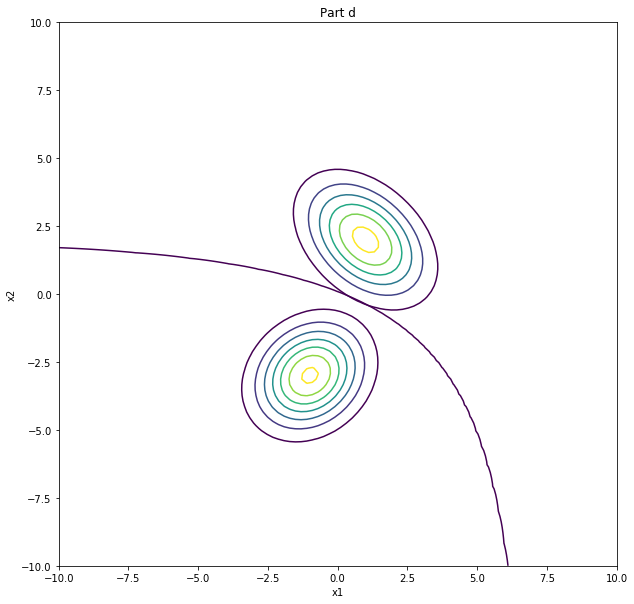

In [22]:
plt.figure(figsize = (10,10))
g = Z1-(3*Z2)
plt.contour(X, Y, Z1)
plt.contour(X, Y, Z2)
plt.contour(X, Y, g, levels=[0])
plt.title('Part d')
plt.ylabel("x2")
plt.xlabel("x1")
plt.show()

In [23]:
ytrue1,yfalse1 = bayse(sample1, 3)
print("TP: ", ytrue1, "FN: ", yfalse1)

TP:  979 FN:  21


In [24]:
yfalse2,ytrue2 = bayse(sample2, 3)
print("TN: ",ytrue2, "FP: ", yfalse2)

TN:  993 FP:  7


In [25]:
error1 = (yfalse1+yfalse2)/(sample1.shape[0]+sample2.shape[0])
print("Bayse Classification Error: ", error1)

Bayse Classification Error:  0.014


In [26]:
recall = ytrue1/sample1.shape[0]
precision = ytrue1/(ytrue1+yfalse2)
fscore = (2*precision*recall)/(precision+recall)
print("Part d F-Score: ", fscore)

Part d F-Score:  0.985901309164149


## e.

In [27]:
error01 = 0
error02 = 0

for e in range(20):
    sample1 = rv1.rvs(1000)
    sample2 = rv2.rvs(1000)
    ytrue1,yfalse1 = bayse(sample1, 1)
    #print(ytrue1,yfalse1)
    yfalse2,ytrue2 = bayse(sample2, 1)
    #print(ytrue2,yfalse2)
    error01 += (yfalse1+yfalse2)/(sample1.shape[0]+sample2.shape[0])
    ytrue1,yfalse1 = mdc(sample1)
    #print(ytrue1,yfalse1)
    ytrue2,yfalse2 = mdc(sample2)
    #print(ytrue2,yfalse2)
    error02 += (yfalse1+yfalse2)/(sample1.shape[0]+sample2.shape[0])
error01 /= 20
error02 /= 20

print("Average Bayse Classification Error: ", error01, "Average MD Classification Error: ", error02)

Average Bayse Classification Error:  0.014150000000000006 Average MD Classification Error:  0.025075000000000007
